# Exploration du jeu de données

La base de données sur laquelle nous allons travailler est la base [MNIST](http://yann.lecun.com/exdb/mnist/) qui regroupe un grand nombre de chiffres écrits à la main et leur label correspondant. Voyons à quoi elle ressemble.

Tensorflow propose directement de télécharger ces données via son API sous la forme d'un jeu de données d'entrainement et un jeu de données de test

In [18]:
import tensorflow as tf
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


## Structure des données

Les variables x et y sont des tableaux de type numpy.ndarray de 60K lignes pour les données d'entrainement et de 10 000 pour les données de test.

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
y_train.shape

(60000,)

In [23]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

## Visualisation des données

In [31]:
import matplotlib.pyplot as plt
import random

Visualisation d'une image au hasard dans l'ensemble d'entrainement:

Image numéro 29789
Label associé: y_train[29789] = 2


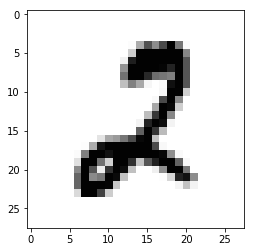

In [47]:
index = random.randrange(60000)+1
print("Image numéro {}".format(index))
print("Label associé: y_train[{}] = {}".format(index,y_train[index]))
plt.imshow(x_train[index], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble de test:

Image numéro 1088
Label associé: y_test[1088] = 9


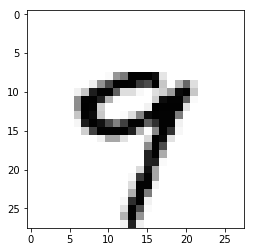

In [48]:
index = random.randrange(10000)+1
print("Image numéro {}".format(index))
print("Label associé: y_test[{}] = {}".format(index,y_test[index]))
plt.imshow(x_test[index], cmap='Greys')